In [55]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = '/Users/katyproctor/Downloads/'
co1 = fits.open(path + 'co_1_0.mom0.fits')
co2 = fits.open(path + 'co_2_1.mom0.fits')
co3 =fits.open(path + 'co_3_2.mom0.fits')

In [59]:
co1_dat = co1[0].data[0][0]
co2_dat = co2[0].data[0][0]
co3_dat = co3[0].data[0][0]

In [63]:
header = co1[0].header
wcs_helix = WCS(header).celestial

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [56]:
# for coordinate labels
wcs_input_dict = {
    'CTYPE1': 'RA---TAN',
    'CUNIT1': 'deg',
    'CDELT1': -0.0002777777778,
    'CRPIX1': 1,
    'CRVAL1': 337.5202808,
    'NAXIS1': 1024,
    'CTYPE2': 'DEC--TAN',
    'CUNIT2': 'deg',
    'CDELT2': 0.0002777777778,
    'CRPIX2': 1,
    'CRVAL2': -20.833333059999998,
    'NAXIS2': 1024
}
wcs_helix_dict = WCS(wcs_input_dict)

In [4]:
rms1=2.8637e-2
rms2=1.33e-2
rms3= 3.77544e-2

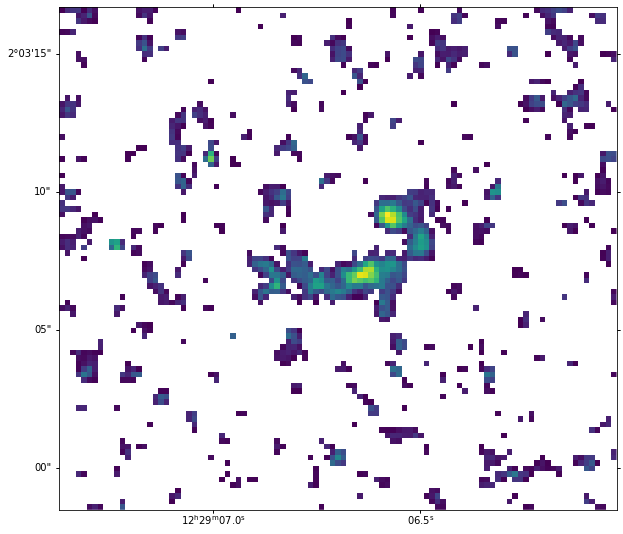

In [64]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)

plt.imshow(np.ma.masked_less(co1_dat, rms1));

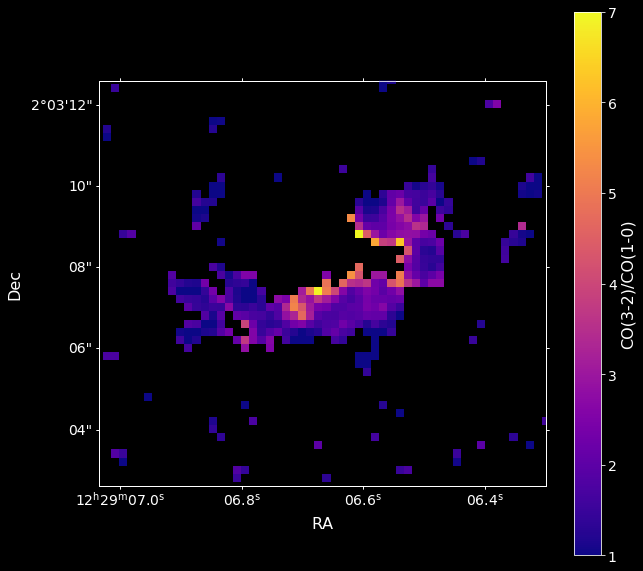

In [93]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.style.use('dark_background')


plt.imshow(np.ma.masked_less(co3_dat, rms3)/np.ma.masked_less(co1_dat, rms1), 
           vmin = 1, vmax = 7, origin='lower',cmap='plasma')
cbar = plt.colorbar()
plt.xlim((25,80))
plt.ylim((20,70))

cbar.set_label("CO(3-2)/CO(1-0)", fontsize = 16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'RA', fontsize=16)
plt.ylabel(r'Dec', fontsize=16)
ax.tick_params(labelsize=14)
plt.savefig('plots/co_32_10_excitation_map.png', dpi = 300, bbox_inches = "tight");

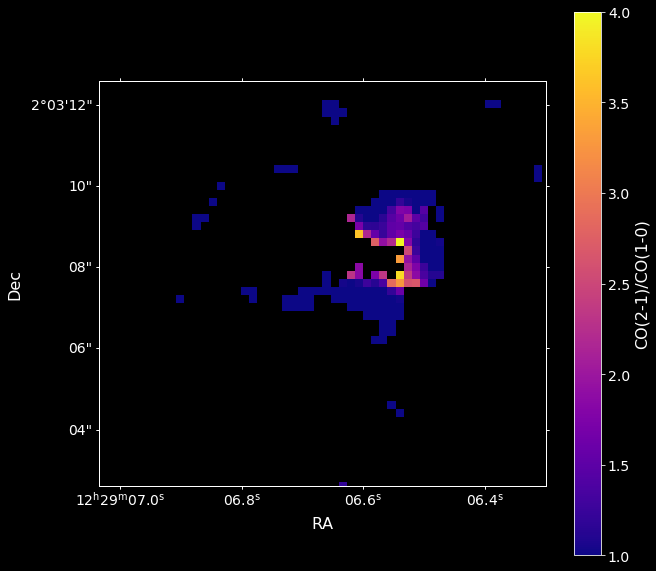

In [96]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.style.use('dark_background')

plt.imshow(np.ma.masked_less(co2_dat, rms2)/np.ma.masked_less(co1_dat, rms1),
           vmin = 1, vmax = 4, origin='lower',cmap='plasma')
cbar = plt.colorbar()
plt.xlim((25,80))
plt.ylim((20,70))

cbar.set_label("CO(2-1)/CO(1-0)", fontsize = 16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'RA', fontsize=16)
plt.ylabel(r'Dec', fontsize=16)
ax.tick_params(labelsize=14)
plt.savefig('plots/co_21_10_excitation_map.png', dpi = 300, bbox_inches = "tight");

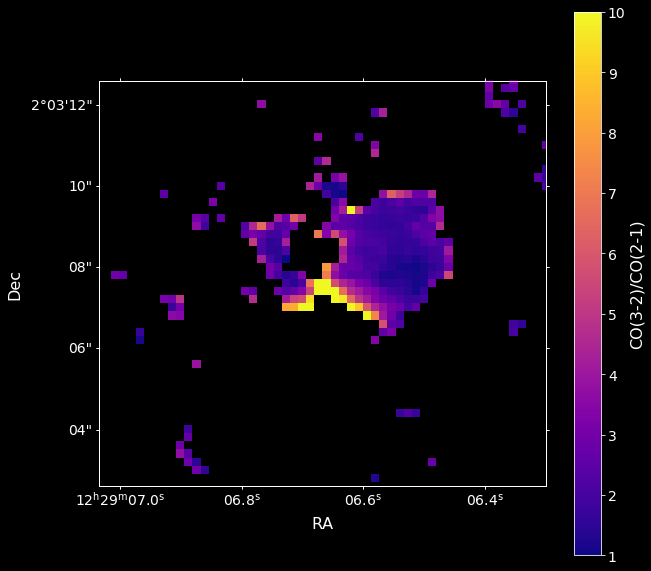

In [99]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.style.use('dark_background')

plt.imshow(np.ma.masked_less(co3_dat, rms3)/np.ma.masked_less(co2_dat, rms2),
          origin='lower',vmin = 1, vmax = 10,cmap='plasma')
cbar = plt.colorbar()
plt.xlim((25,80))
plt.ylim((20,70))

cbar.set_label("CO(3-2)/CO(2-1)", fontsize = 16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'RA', fontsize=16)
plt.ylabel(r'Dec', fontsize=16)
ax.tick_params(labelsize=14)